# Introduction to the refactored SN shell model

I have refactored Ivan's code. It is now written in Python and organised in an object oriented fashion to allow easy extension. Parts of the calculation were accelerated using [numba](https://numba.pydata.org/).

First, some basic imports:

In [1]:
import os, sys
sys.path.append('../')

from shell import ShellModel, FieldTransformer

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import imagine as img

The model for the SN shell formation/evolution is taken care of by the ShellModel class. 
Below this is initialized with its default parameters (which characterise the shell properties).

In [8]:
shell_model = ShellModel(V0=0.0153*u.pc/u.yr,
                         a=1.3, b=10, R=50*u.pc,
                         elapsed_time=1300*u.yr)

(this object provides the methods `initial_radius` and `dr_dr0` which are used in the later transformtions)

For convenience, the coordinates are specified using an [IMAGINE's grid object](https://imagine-code.readthedocs.io/en/latest/imagine.fields.html?highlight=grid#imagine.fields.grid.UniformGrid). Such object can be initialized in the following way:

In [9]:
L = 70*u.pc
N = 64

grid = img.UniformGrid(# coordinate values for edges of the grid box
                       box=[[-L,L],[-L,L],[-L,L]], 
                       # Grid resolution
                       resolution=[N, N, N])

With the coordinate grid and the model for the shell evolution, we have all the elements to transform a magnetic field or a density field. This procedure is performed by the `FieldTransformer` class, which has first to be initialized.

In [13]:
field_transformer = FieldTransformer(grid, shell_model)

Given some initial ambient magnetic field and density field, this object can produce the magnetic field and density on a shell after the SN explosion. 

Let us now construct a model for the initial density field

In [15]:
n0 = np.ones(grid.shape) * u.cm**(-3) # Constant unit density

This can be substituted by any complicated array...

Likewise, let us illustrate an initial magnetic field with a constant field

In [39]:
Bx0 = np.ones(grid.shape) * u.microgauss
By0 = np.ones(grid.shape) * u.microgauss
Bz0 = np.ones(grid.shape) * u.microgauss

again, we can substitute this field by anything we imagine.

The field and density after the SN explosion is computed by the following line:

In [40]:
n, [Bx, By, Bz] = field_transformer(n0, [Bx0, By0, Bz0])

Let us plot those to see what we get

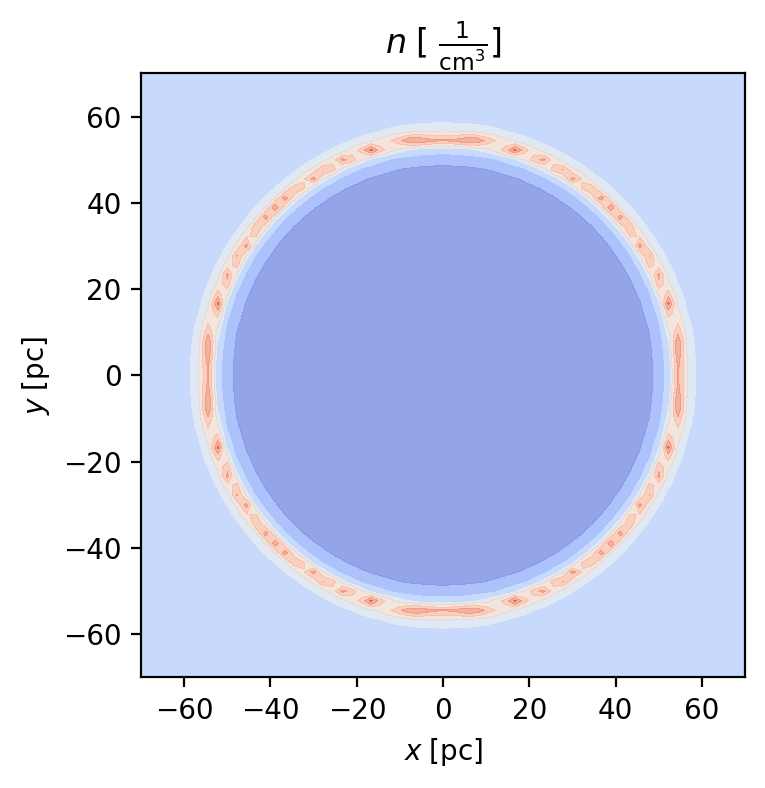

In [51]:
pos=40

plt.figure(dpi=200); ax = plt.subplot(111)
ax.contourf(grid.x[:,:,pos],grid.y[:,:,pos], n[:,:,pos], 
            alpha=0.6, cmap='coolwarm')
ax.set_aspect(1); ax.set_title('$n\;[$ ' + n.unit._repr_latex_()+'$]$');
ax.set_xlabel(r'$x\;[\rm pc]$'); ax.set_ylabel(r'$y\;[\rm pc]$');

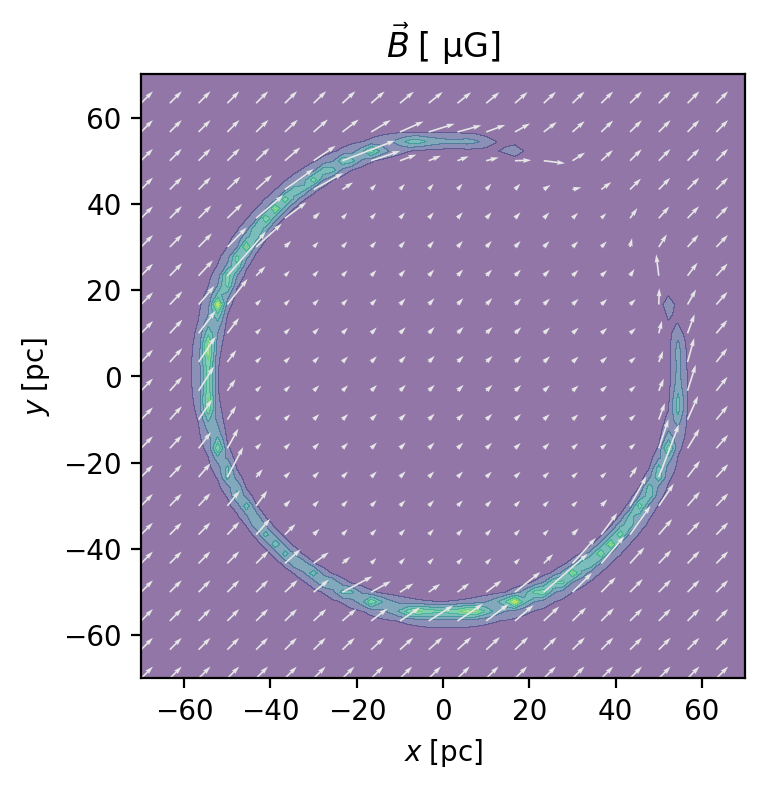

In [52]:
B2 = Bx**2+By**2+Bz**2

skip=3

plt.figure(dpi=200); ax = plt.subplot(111)
ax.contourf(grid.x[:,:,pos],grid.y[:,:,pos], B2[:,:,pos], alpha=0.6)
ax.quiver(grid.x[::skip,::skip,pos].value, grid.y[::skip,::skip,pos].value, 
           Bx[::skip,::skip,pos].value, By[::skip,::skip,pos].value, color='0.9')
ax.set_aspect(1); ax.set_title(r'$\vec{B}\;[$ ' + Bx.unit._repr_latex_()+'$]$');
ax.set_xlabel(r'$x\;[\rm pc]$'); ax.set_ylabel(r'$y\;[\rm pc]$');